<a href="https://colab.research.google.com/github/BalkiTena/BalkiTena/blob/main/Proyecto_MLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de regresión logística: Caso Cancer de seno


In [1]:
# Importamos las librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
# Leemos nuestra data y lo guardamos en una variable df (dataframe)
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Realizamos un análisis de como esta conformado la data y de que tipo son las colummnas
# Además que veremos si hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Eliminamos las columnas que no aportan valor a nuestra data como id y Unnamed: 32
df.drop(columns=['Unnamed: 32','id'], inplace=True)

In [5]:
# Como toda nuestras columnas son númericas realizamos una descripción para analizar la existencia posibles de Outliers
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Convertir a valor númerico

In [6]:
# Como este es un problema binomial transformamos nuestra variables depediente pasando de un valor categorico a un valor númerico
df['diagnosis'].replace(to_replace='M', value=1, inplace=True)
df['diagnosis'].replace(to_replace='B', value=0, inplace=True)

# Análisis Exploratorio

In [7]:
# Realizamos una copia de nuestra base original
df_data_processing = df.copy()

In [8]:
# Realizamos un análisis explotario de nuestra variable depediente

# Recordemos que 0 = Benigno y 1 = Maligno
df_data_processing.diagnosis.value_counts(normalize=True)*100

diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64

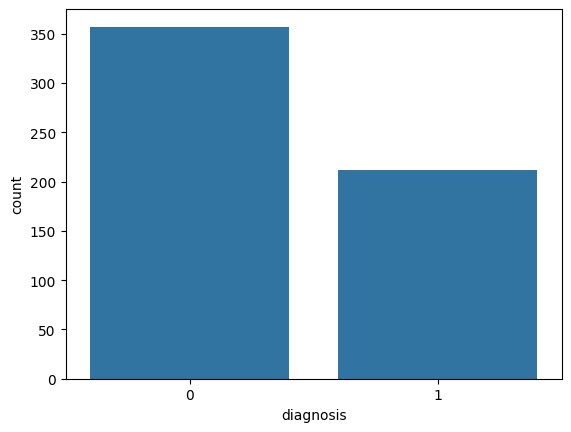

In [9]:
# Ahora haremos una visualización de lo analizado
sns.countplot(x=df_data_processing.diagnosis)
plt.show()

Vemos que hay más datos en una categoria que en otra, por mientras lo dejaremos así para ver que tal le va a nuestro modelo.
Más adelante aplicaremos un balanceo a nuestra data.

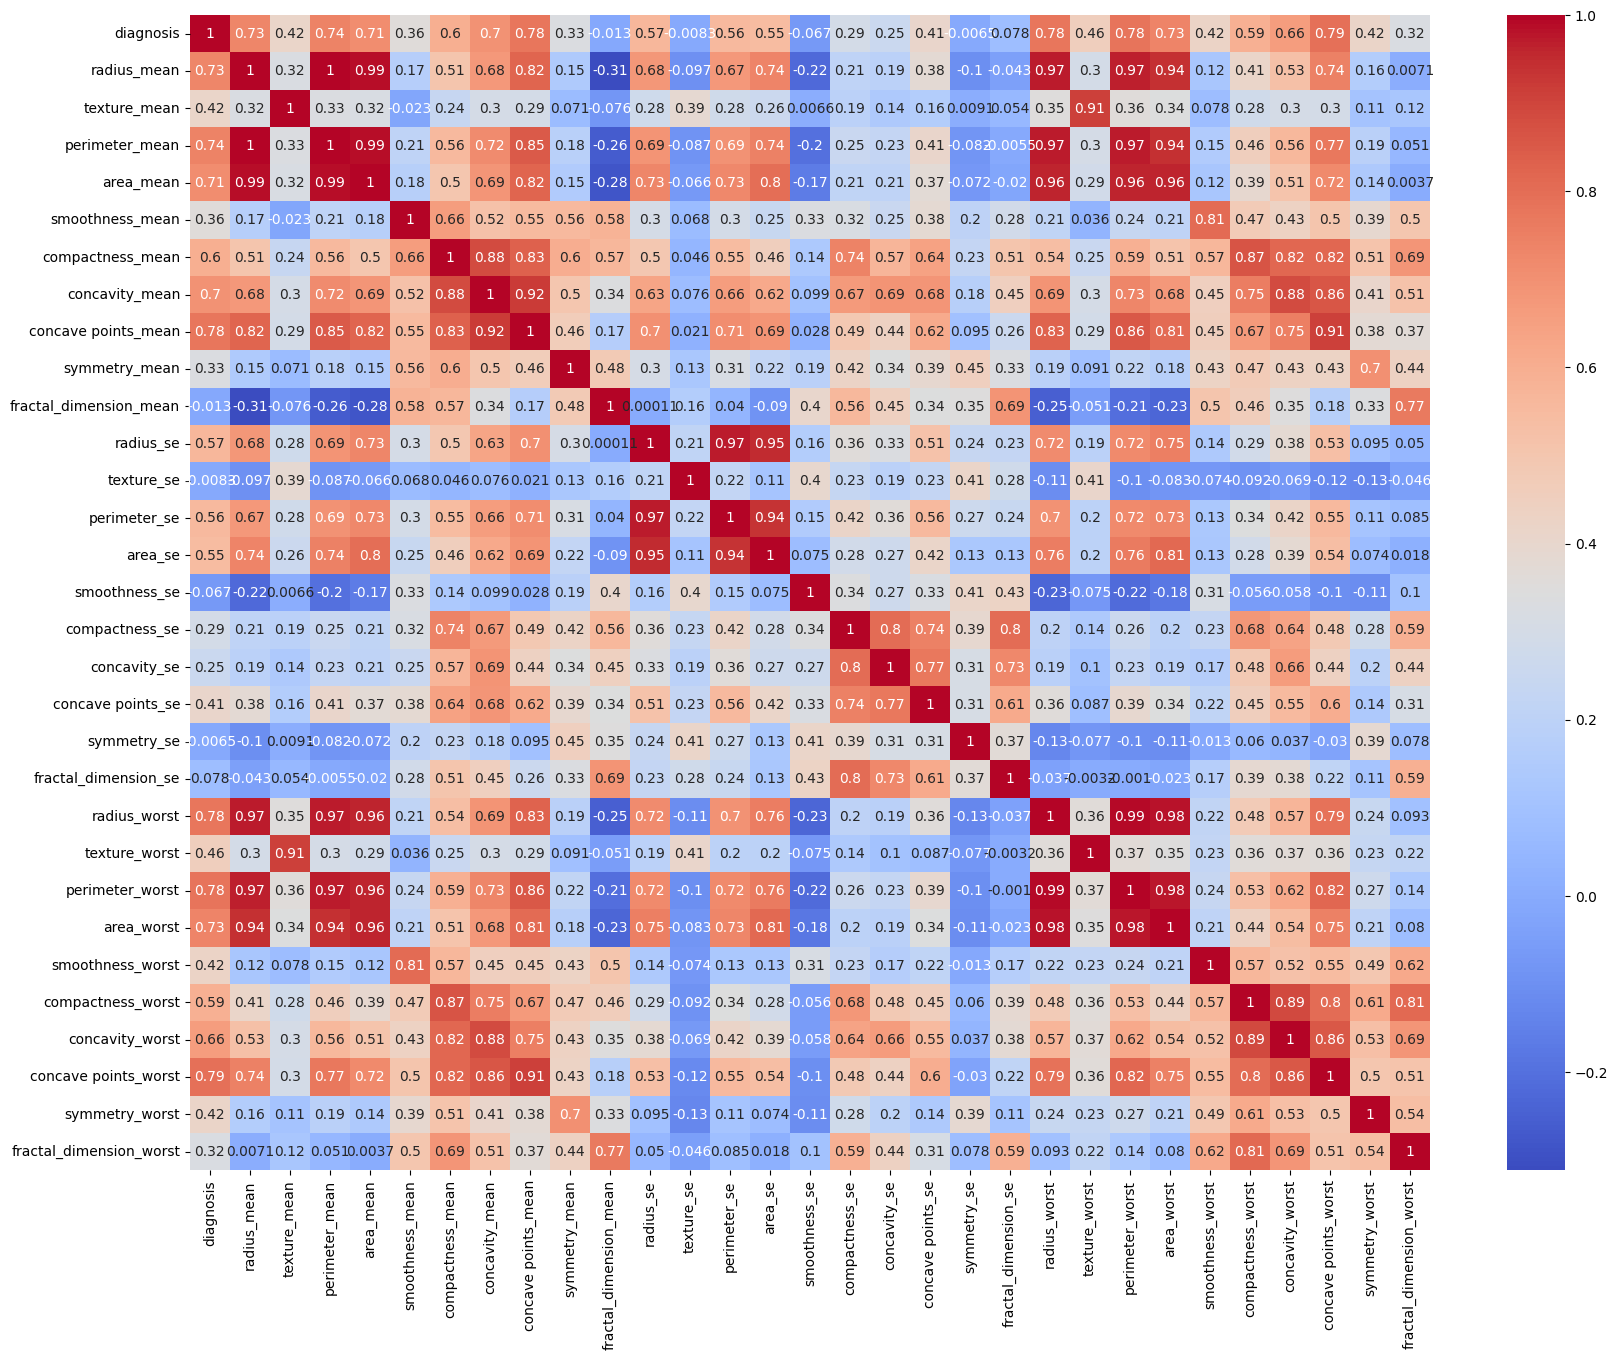

In [10]:
# Graficamos la correlación de nuestras variables
plt.figure(figsize=(20,15))
sns.heatmap(df_data_processing.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Realizaremos ahora un gráfico interactivo con la libreria Plotly
import plotly.graph_objects as go

data_corr = pd.DataFrame(df_data_processing.corr()['diagnosis'].sort_values()[:-1]).reset_index()

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=data_corr['index'],
        y=data_corr['diagnosis'],
        marker=dict(cmax=1, cmin=-1, color=data_corr['diagnosis'], showscale=True,colorbar={"title": "Correlation"})))

fig.update_xaxes(tickangle=60, tickfont=dict(family='Arial', size=10), automargin='height')
fig.update_layout(title_text='Gráfico de correlación de nuestra variable diagnosis', xaxis_title="Feature", yaxis_title="Correlation")
fig.show()

Como hemos visto en el gráfico de las correlaciones hay variables que tienen una alta correlación entre si. Lo que debemos proceder es a eliminar dichas columnas para que no exista multicolinealidad, que repercutiria en nuestro modelo generando overfitting.

In [12]:
# Primero haremos una copia de nuestra data

df_data_sel = df_data_processing.copy()

# Borramos todas las variables "worst", seguidos de las variables "perimeter" y
# "area", ya por ultimo borramos todas las varuables "Concavity" y "concave points"

drop = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se',
        'concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']

df_data_sel = df_data_sel.drop(drop, axis=1)

# Verificamos que variables o columnas quedaron resultantes.

df_data_sel.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

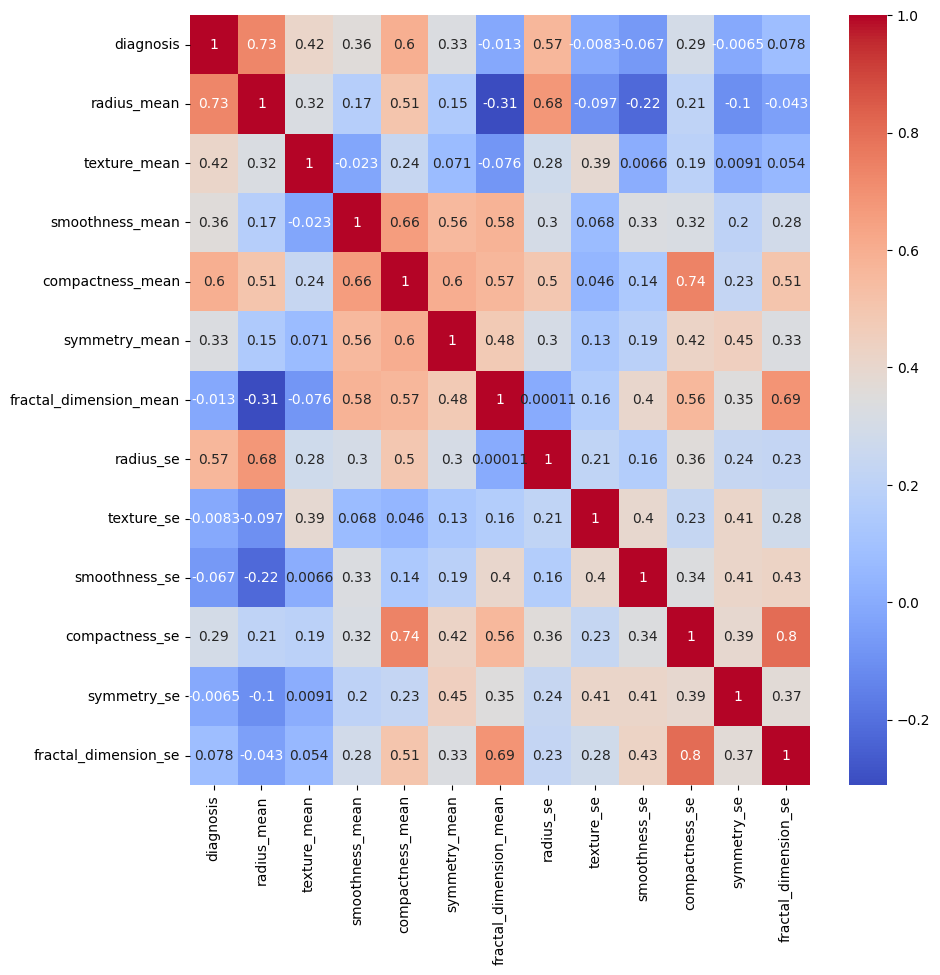

In [13]:
# Volveremos a graficar el gráfico de correlación mediante Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df_data_sel.corr(), annot=True, cmap='coolwarm')
plt.show()

Como podemos visualizar las variables con alta correlación ya no están, esto ayudará a que nuestro modelo nos de un mejor resultado a la hora de ponerlo a práctica

# Escalamiento de los datos

In [14]:
# Realizamos un escalamiento de nuestra data para normalizarla
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_sel_scaled = scaler.fit_transform(df_data_sel)

In [15]:
df_data_sel_scaled = pd.DataFrame(df_data_sel_scaled, columns=df_data_sel.columns)
df_data_sel_scaled.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1.0,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.311645,0.183042
1,1.0,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.084539,0.091110
2,1.0,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.205690,0.127006
3,1.0,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.139091,0.175875,0.251453,0.543215,0.728148,0.287205
4,1.0,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.233822,0.093065,0.332359,0.167918,0.136179,0.145800


In [16]:
#sns.pairplot(df_data_sel_scaled, hue='diagnosis')
#plt.show()

# Entrenamiento del modelo

In [17]:
# Ahora lo que haremos es la solución de nuestro problema de regresión logistica binomial

# El primer paso será dividir nuestra data en dos: variable dependiente y nuestras variables independientes

X = df_data_sel_scaled.drop('diagnosis', axis=1)
y = df_data_sel_scaled['diagnosis']

In [18]:
# Como segundo paso será ahora la repartición de nuestra data: en datos de entrenamiento y datos de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# En nuestro tercer paso ahora será definir nuestro modelo y ponerlo a practica

Logreg = LogisticRegression()
result = Logreg.fit(X_train, y_train)

In [20]:
# Como cuarto paso veremos el score que arroja nuestro modelo diseñado
# Como quinto paso definimos la predicción de nuestro modelo
from sklearn import metrics
from sklearn.metrics import classification_report

prediction_test = Logreg.predict(X_test)
print(classification_report(y_test, prediction_test))
print('El acurracy es: ',metrics.accuracy_score(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        71
         1.0       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

El acurracy es:  0.9473684210526315


# Evaluación del modelo

In [21]:
# Medimos cual es la probabilidad de que cada valor de nuestra data de prueba de
# como resultado sea 1 o 0
Logreg.predict_proba(X_test)

array([[0.7281963 , 0.2718037 ],
       [0.22014185, 0.77985815],
       [0.35532306, 0.64467694],
       [0.78639352, 0.21360648],
       [0.88918922, 0.11081078],
       [0.00532497, 0.99467503],
       [0.02168273, 0.97831727],
       [0.43332543, 0.56667457],
       [0.63093252, 0.36906748],
       [0.87738807, 0.12261193],
       [0.75960309, 0.24039691],
       [0.46608855, 0.53391145],
       [0.7904442 , 0.2095558 ],
       [0.3205864 , 0.6794136 ],
       [0.92455034, 0.07544966],
       [0.1001314 , 0.8998686 ],
       [0.8535011 , 0.1464989 ],
       [0.91470668, 0.08529332],
       [0.97625593, 0.02374407],
       [0.05093285, 0.94906715],
       [0.70292175, 0.29707825],
       [0.79335332, 0.20664668],
       [0.02022963, 0.97977037],
       [0.94965949, 0.05034051],
       [0.86057056, 0.13942944],
       [0.68642456, 0.31357544],
       [0.87770911, 0.12229089],
       [0.85904843, 0.14095157],
       [0.8156337 , 0.1843663 ],
       [0.10021303, 0.89978697],
       [0.

In [22]:
# Estos son los coeficientes de los features que tienen más peso a la hora de
# pronosticar que valor tendra nuestro diagnosis, los coeficientes positivos nos
# Ayudan a dar un diagnosis maligno, y los negativos a dar un diagnosis benigno
Logreg.coef_

array([[ 5.93041143,  3.17890434,  2.13996486,  3.65957199,  1.75636336,
        -0.86083748,  2.45499939, -0.59494303, -0.48915006,  0.28012705,
        -0.61637264, -0.72097555]])

In [23]:
# Vemos los nombre de los features
Logreg.feature_names_in_

array(['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


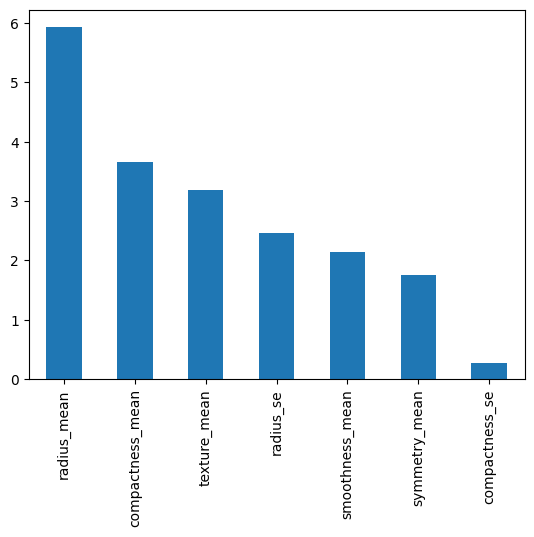

In [24]:
# Graficamos los features que tienen peso para que se de el diagnosis como maligno
weights = pd.Series(Logreg.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:7].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


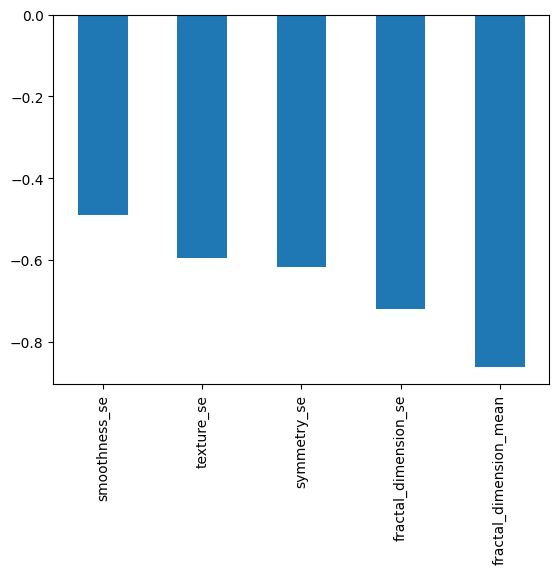

In [25]:
# Graficamos los features que tienen peso para que se de el diagnosis como benigno
print(weights.sort_values(ascending=False)[-5:].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

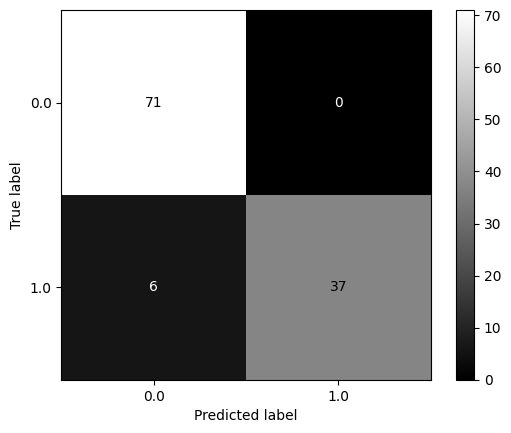

In [26]:
# Gráficamos nuestra matrix de confusión para analizar cuantos valores fueron
# predichos correctamente por el modelo

fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=Logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=Logreg.classes_)
disp.plot(cmap='gray')
plt.show()

En nuestra matrix de Confusión podemos visualizar que hubo un 71 aciertos al momento de predecir los valores 0 que si recordamos en nuestra variable diagnosis significaba un tumor benigno y hubo 0 erroes en clasificar este valor.
Ahora si bien con respecto al valor 1 que significa tumores malignos podemos visualizar que hubo 6 erroes al momento de pronosticar y 37 aciertos esto seria más bajo a comparación del valor 0, si recordamos al inicio del proyecto vimos que habia mucho más valores 0 que 1 esto seria un desbalance en nuestra data y no ayudaria a predecir con mayor exactitud nuestro modelo.
Por eso ahora veremos como le va nuestro modelo después de balancerla.

# **Balanceo de datos**

## Metodo 1 de Balanceo

El primer metodo de Balanceo a usar será el de RandomUnderSampler:
Este metodo hace que la clase mayoritaria se seleccione aleatoriamente para
disminuir su tamaño a la misma proporción de la clase minoritaria

In [27]:
# Importamos nuestra libreria
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [28]:
# Balanceamos la data dividida
X_over, y_over = undersample.fit_resample(X, y)

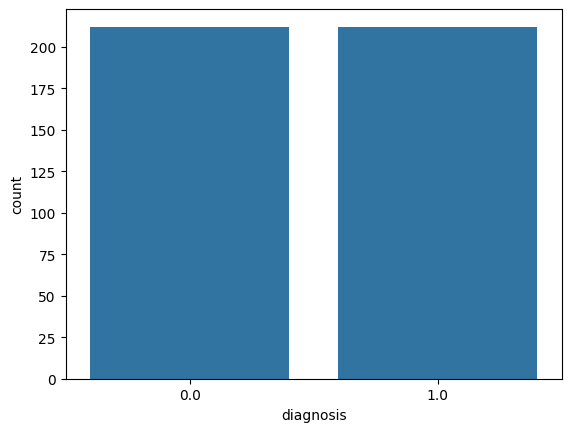

In [29]:
# Recontabilizamos a través de un gráfico de barras donde podemos apreciar que
# la data ya no está desbalanceada
sns.countplot(x=y_over)
plt.show()

In [30]:
print(df.shape)
print(X_over.shape)
print(y_over.shape)

(569, 31)
(424, 12)
(424,)


In [31]:
# Volvemos a clasificar ahora con nuestra data balanceada
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [32]:
# Volvemos a codificar nuestro modelo

Logreg_over = LogisticRegression()
result_over = Logreg_over.fit(X_train, y_train)

In [33]:
# Volvemos a analizar los resultados de este nuevo modelo
prediction_test_over = Logreg_over.predict(X_test)
print(classification_report(y_test, prediction_test_over))
print('El acurracy del modelo es: ',metrics.accuracy_score(y_test, prediction_test_over))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        46
         1.0       0.95      0.92      0.94        39

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85

El acurracy del modelo es:  0.9411764705882353


Axes(0.125,0.11;0.775x0.77)


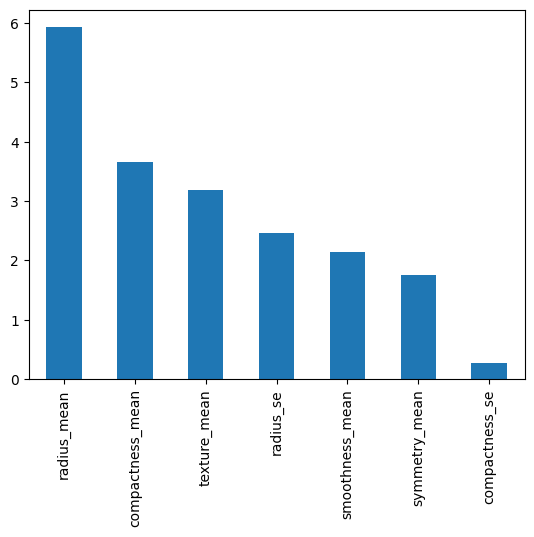

In [34]:
# Graficamos de nuevo los features que tienen más peso con respecto a dar un
# diagnostico maligno
weights_over = pd.Series(Logreg_over.coef_[0],
                    index=X.columns.values)
print(weights.sort_values(ascending=False)[:7].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


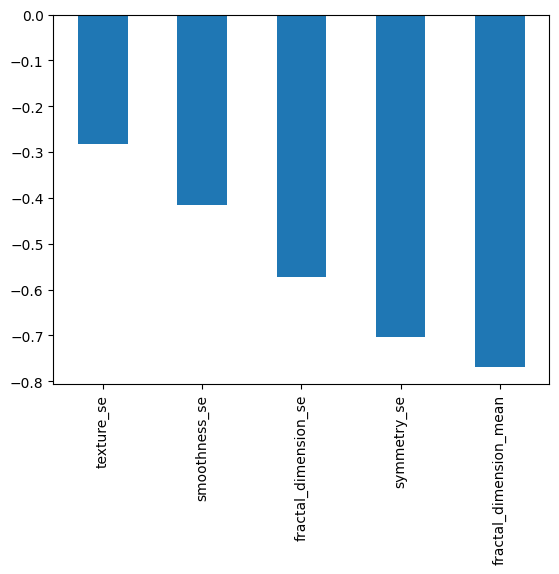

In [35]:
print(weights_over.sort_values(ascending=False)[-5:].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

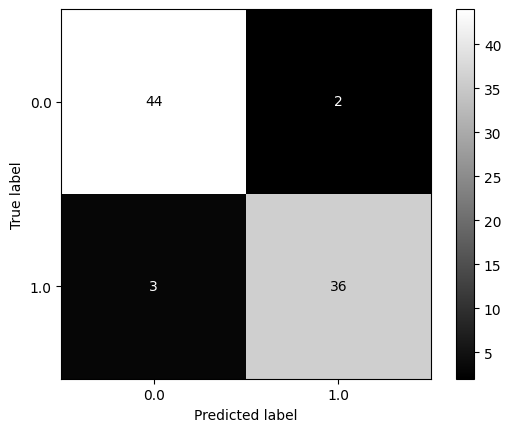

In [36]:
# Volvemos a graficar nuestra matrix de confusión
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test_over, labels=Logreg_over.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=Logreg_over.classes_)
disp.plot(cmap='gray')
plt.show()

Podemos visualizar que si bien nuestra data esta más balanceada, obtenemos un acurracy menor además que ahora nuestro modelo tiene 2 errores al momento de predecir si el tumor es benigno y 3 errores si trata de predecir si el tumor es maligno. Al momento de aplicar el balanceo por Undersampling posiblemente al seleccionar la data de forma aleatoria haya obviado data importante para que nuestro modelo sea más preciso al momento de dar resultados.

## Metodo 2 de balanceo

El segundo metodo de balanceo a usar será el de SMOTEEN que selecciona
aleatoriamente una muestra de la clase minoritaria y uno de sus vecinos más cercanos
con el objetivo de igualar la distribución de la clase minoritaria con la mayoritaria.
Además limpia del conjunto de datos de la clase mayoritaria ejemplos ruidosos que se alejan
de nuestra clase minoritaria

In [37]:
# Importamos la libreria y volvemos a balancear la data repartida
from imblearn.combine import SMOTEENN
imp = SMOTEENN(sampling_strategy=0.99, random_state=42)
X_smt, y_smt = imp.fit_resample(X, y)

In [38]:
# Visualizamos ahora la nueva proporción
y_smt.value_counts(normalize=True)*100

diagnosis
1.0    51.935484
0.0    48.064516
Name: proportion, dtype: float64

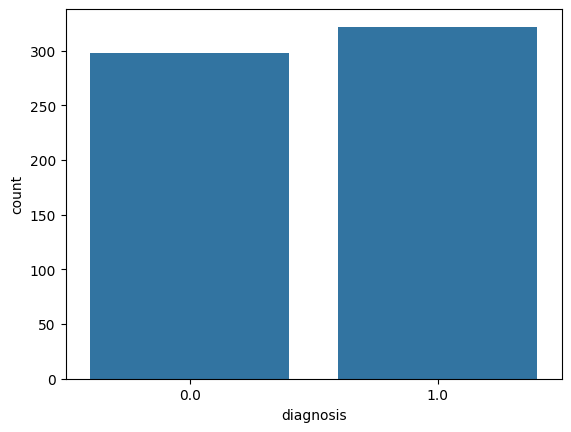

In [39]:
# Graficamos ahora la nueva proporción
sns.countplot(x=y_smt)
plt.show()

In [40]:
print(df.shape)
print(X_smt.shape)
print(y_smt.shape)

(569, 31)
(620, 12)
(620,)


In [41]:
# Volvemos a clasificar ahora con nuestra data balanceada
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=42)

In [42]:
# Volvemos a ejecutar el modelo

Logreg_smt = LogisticRegression()
result_smt = Logreg_smt.fit(X_train, y_train)

In [43]:
# Volvemo a analizar los resultados de nuestro nuevo modelo
prediction_test_smt = Logreg_smt.predict(X_test)
print(classification_report(y_test, prediction_test_smt))
print('El acurracy de nuestro modelo es: ', metrics.accuracy_score(y_test, prediction_test_smt))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        61
         1.0       1.00      0.97      0.98        63

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124

El acurracy de nuestro modelo es:  0.9838709677419355


Axes(0.125,0.11;0.775x0.77)


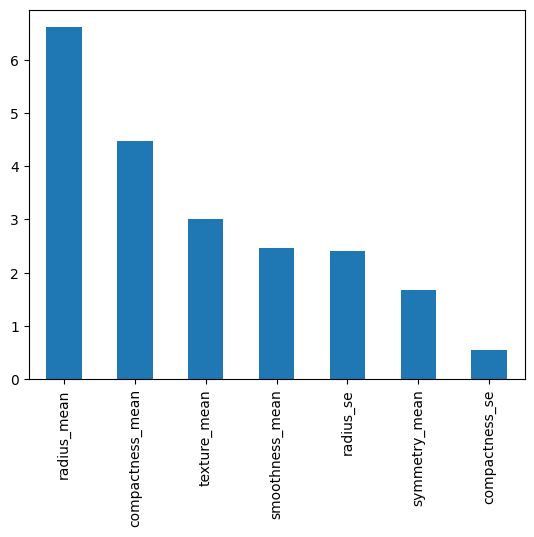

In [44]:
# Volvemos a ver que los pesos de los futures han cambiado
weights_smt = pd.Series(Logreg_smt.coef_[0],
                    index=X.columns.values)
print(weights_smt.sort_values(ascending=False)[:7].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


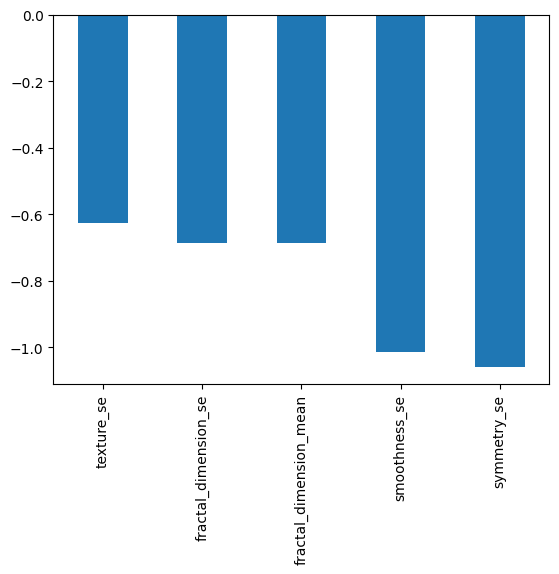

In [45]:
print(weights_smt.sort_values(ascending=False)[-5:].plot(kind='bar'))

<Figure size 1100x1100 with 0 Axes>

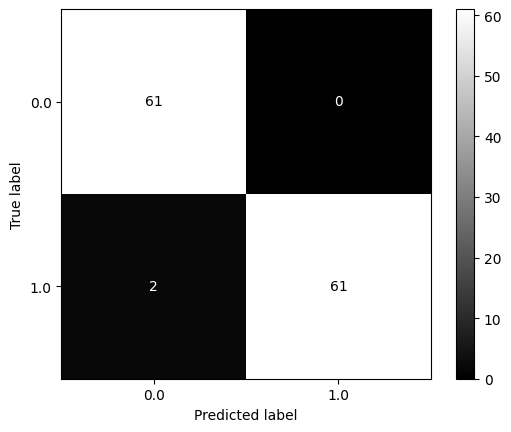

In [46]:
# Ahora graficamos nuestra matrix de confusión
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test_smt, labels=Logreg_smt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=Logreg_smt.classes_)
disp.plot(cmap='gray')
plt.show()

El uso de SMOTEENN ha mejorado significativamente el rendimiento del modelo comparado con el uso de undersampling solo. Este método híbrido ha permitido no solo aumentar el número de ejemplos en la clase minoritaria, sino también limpiar el conjunto de datos de ejemplos ruidosos o problemáticos, resultando en un modelo más preciso y con mejor capacidad de generalización.